In [11]:
# Dependencies
import numpy as np
import pandas as pd
from citipy import citipy

# Generate random latitudes and longitudes
latitudes = np.random.uniform(-90.0, 90.0, size=1500)
longitudes = np.random.uniform(-180.0, 180.0, size=1500)

# Combine latitudes and longitudes
coordinates = list(zip(latitudes, longitudes))

# Create lists to hold the cities and unique city names
cities = []

# Identify nearest city for each latitude, longitude pair
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then add it to cities list
    if city not in cities:
        cities.append(city)

print(f"Number of unique cities: {len(cities)}")


Number of unique cities: 600


In [12]:
import requests
from api_keys import weather_api_key

# Define API endpoint and units (imperial or metric)
url = "http://api.openweathermap.org/data/2.5/weather"
units = "imperial"  # Or "metric" for Celsius

# Create empty lists to hold weather data
city_data = []

for city in cities:
    # Build query URL
    query_url = f"{url}?q={city}&appid={weather_api_key}&units={units}"

    try:
        response = requests.get(query_url).json()
        # Collect needed data from the response
        city_weather = {
            "City": city,
            "Lat": response["coord"]["lat"],
            "Lng": response["coord"]["lon"],
            "Max Temp": response["main"]["temp_max"],
            "Humidity": response["main"]["humidity"],
            "Cloudiness": response["clouds"]["all"],
            "Wind Speed": response["wind"]["speed"],
            "Country": response["sys"]["country"],
            "Date": response["dt"]
        }
        city_data.append(city_weather)

    except KeyError:
        # Skip cities that don't return data
        print(f"City not found: {city}")
        pass

# Convert to DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head()


City not found: puerto san carlos
City not found: devinuwara
City not found: taiohae
City not found: liupanshui
City not found: cumaribo
City not found: musay'id
City not found: 'ohonua
City not found: takamaka
City not found: tranovaho
City not found: cargados carajos
City not found: asau village
City not found: toga village
City not found: al-`ula
City not found: viligili
City not found: vingt cinq
City not found: ahau
City not found: tobi village
City not found: bayan nur
City not found: 'ibri
City not found: isle of lewis
City not found: sonsorol village


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,talnakh,69.4865,88.3972,34.41,85,82,3.33,RU,1727316981
1,vorgashor,67.5833,63.9500,29.01,85,100,6.91,RU,1727316989
2,saarijarvi,62.7049,25.2540,53.94,88,57,13.51,FI,1727317052
3,blackmans bay,-43.0167,147.3167,53.73,56,100,1.99,AU,1727316977
4,ushuaia,-54.8000,-68.3000,35.26,87,100,21.85,AR,1727316975


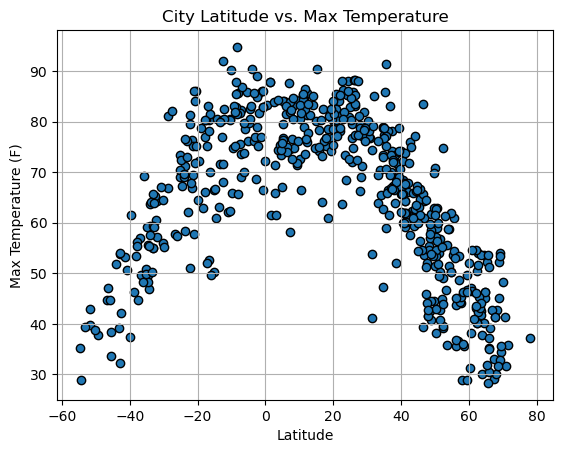

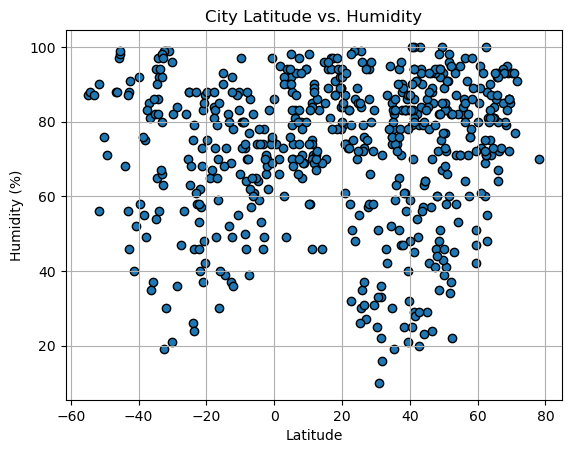

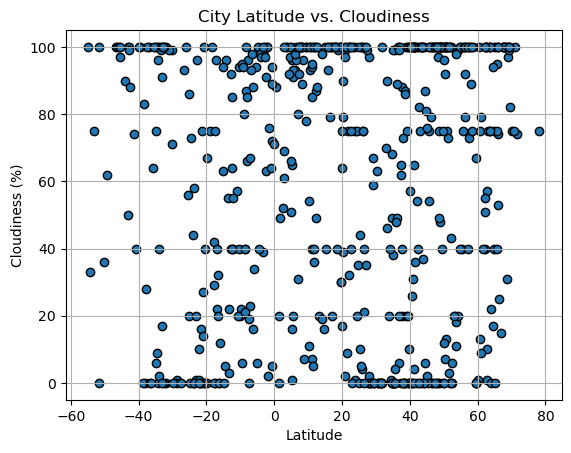

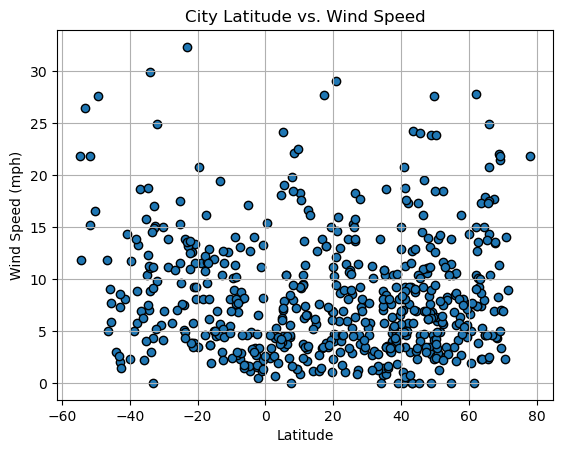

In [13]:
import matplotlib.pyplot as plt

# Latitude vs. Temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black", linewidths=1, marker="o")
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)
plt.show()

# Latitude vs. Humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black", linewidths=1, marker="o")
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)
plt.show()

# Latitude vs. Cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor="black", linewidths=1, marker="o")
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)
plt.show()

# Latitude vs. Wind Speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="black", linewidths=1, marker="o")
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)
plt.show()
